# Thompson Sampling

## Importing the libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [27]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [38]:
import random
N = len(dataset)
d = len(dataset.values[0])
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(N):
  ad = 0
  max_random = 0
  for i in range(d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if random_beta > max_random:
      ad = i
      max_random = random_beta
  ads_selected.append(ad)
  if dataset.values[n, ad] == 0:
    numbers_of_rewards_0[ad] += 1
  else:
    numbers_of_rewards_1[ad] += 1
    total_reward += 1

## Visualising the results - Histogram

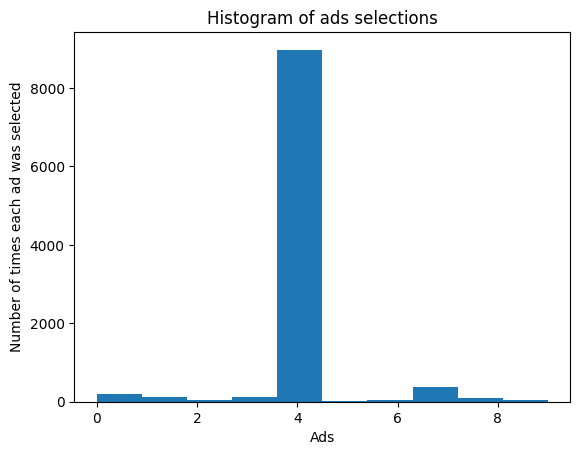

In [39]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()